<a href="https://colab.research.google.com/github/benasphy/DecisionTree/blob/main/Gym_Decision_tree_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
data = {
    "Energy": ["High", "High", "high", "Low", "Low", "Low", "Low", "Low", "Low", "High", "High", "High", "Low", "Low"],
    "Motivation": ["Highly Motivated", "Neutral", "No Motivation", "Neutral", "No Motivation", "Highly Motivated", "Neutral", "Highly Motivated", "Neutral", "Highly Motivated", "Neutral", "No Motivation", "No Motivation", "Neutral"],
    "Gym":[1,1,0,0,0,1,1,1,0,1,1,0,0,0]
}


In [60]:
df = pd.DataFrame(data)
df

,Energy,Motivation,Gym
0,High,Highly Motivated,1
1,High,Neutral,1
2,high,No Motivation,0
3,Low,Neutral,0
4,Low,No Motivation,0
5,Low,Highly Motivated,1
6,Low,Neutral,1
7,Low,Highly Motivated,1
8,Low,Neutral,0
9,High,Highly Motivated,1


In [61]:
#Encodig

df['Energy'] = df["Energy"].map({"High": 1, "Low": 0})
df["Motivation"] = df["Motivation"].map({"Highly Motivated": 2, "Neutral": 1, "No Motivation":0})

X = df[["Energy", "Motivation"]]
y = df["Gym"]

In [62]:
#functio  to calculate entropy
def entropy(target):
  values, counts = np.unique(target, return_counts = True)
  probabilities = counts/len(target)
  return -np.sum(probabilities * np.log2(probabilities))

In [63]:
#Function to calculate conditional entropy

def conditional_entropy(feature, target):
  unique_values, counts = np.unique(feature, return_counts = True)
  probabilities = counts/len(feature)
  conditional_ent = 0
  for value, prob in zip(unique_values,probabilities):
    conditional_ent += prob*entropy(target[feature==value])
  return conditional_ent


In [64]:
#calculate the entropy of the target
total_entropy = entropy(y)

In [65]:
#calculate information gain for each
info_gain_energy = total_entropy - conditional_entropy(X["Energy"], y)
info_gain_motivation = total_entropy - conditional_entropy(X["Motivation"], y)

In [66]:
#Deciding the root node

if info_gain_energy > info_gain_motivation:
  root_feature = "Energy"
  other_feature = "Motivation"
else:
  root_feature = "Motivation"
  other_feature = "Energy"

In [67]:
print(f"Root node: {root_feature}")
print(f"Information Gain - {root_feature}: {max(info_gain_energy, info_gain_motivation)}")
print(f"Other feature = {other_feature}")

Root node: Motivation
Information Gain - Motivation: 0.5714285714285714
Other feature = Energy


In [68]:
X = df[[root_feature, other_feature]]

In [69]:
tree_combined = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
tree_combined.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

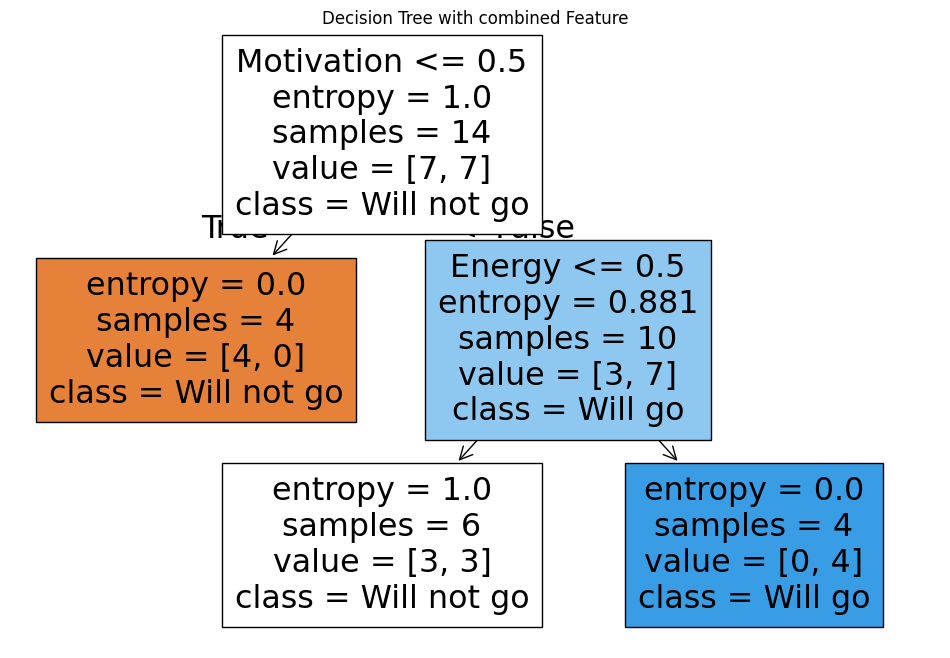

In [70]:
plt.figure(figsize = (12, 8))
plot_tree(tree_combined, feature_names= [root_feature, other_feature], class_names = ["Will not go", "Will go"], filled = True)
plt.title("Decision Tree with combined Feature")
plt.show()

In [71]:
print(export_text(tree_combined, feature_names = [root_feature, other_feature]))

|--- Motivation <= 0.50
|   |--- class: 0
|--- Motivation >  0.50
|   |--- Energy <= 0.50
|   |   |--- class: 0
|   |--- Energy >  0.50
|   |   |--- class: 1

